# Image thresholding
Is a simple form of image segmentation, it is a way to create a binary image based on setting a threshold value on the pixel intensity of the original image

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

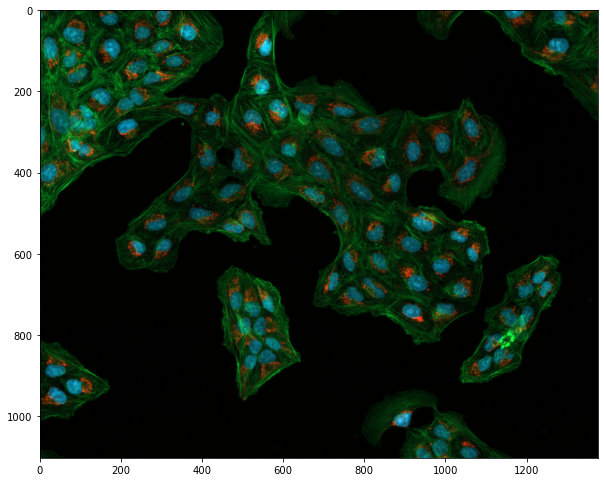

In [7]:
img = cv2.imread("../inpdata/images/Osteosarcoma_01.tif", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,10))
plt.imshow(img)

In [8]:
blue_channel = img[:, :, 2] # blue channel corresponds to nuclei

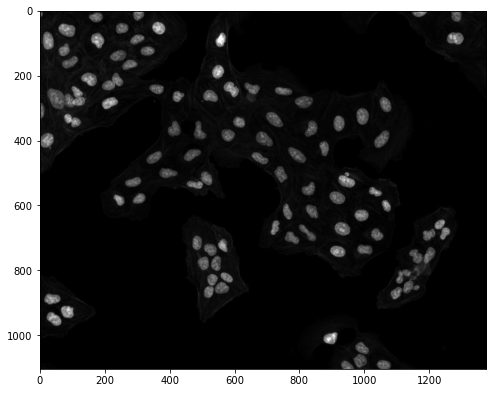

In [11]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(blue_channel, cmap="gray")

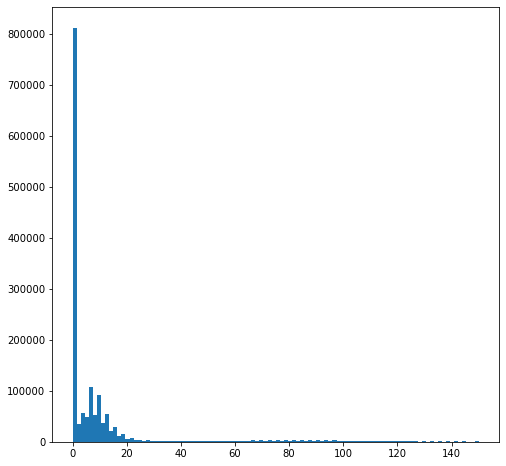

In [15]:
fig = plt.figure(figsize=(8, 8))
plt.hist(blue_channel.flatten(), bins=100, range=(0, 150))
plt.show()

In [21]:
threshold = 40
background = blue_channel <= threshold
nuclei = blue_channel >= threshold

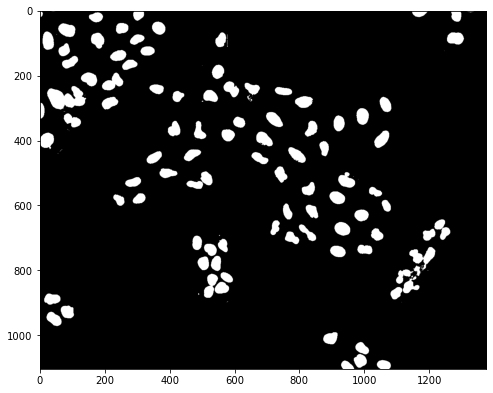

In [22]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(nuclei, cmap = "gray")

In [23]:
# to perform thresholding we also can use cv2
ret1, thresh1 = cv2.threshold(blue_channel, 40, 255, cv2.THRESH_BINARY)

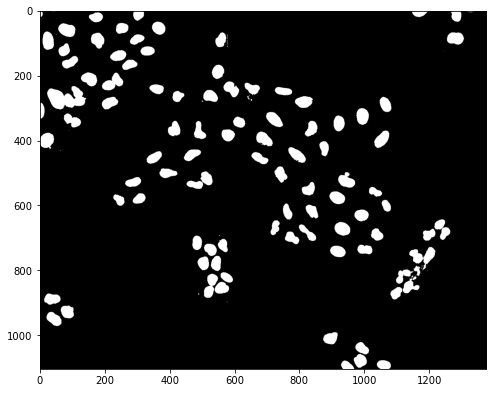

In [27]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(thresh1, cmap = "gray")

50.0


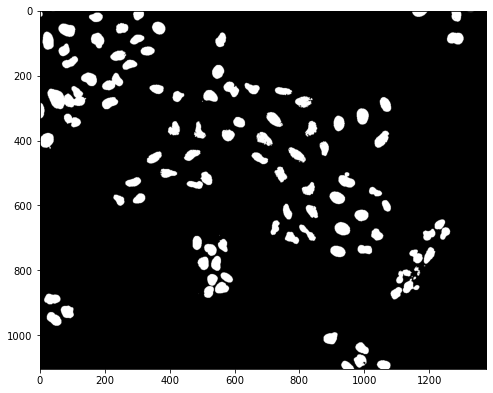

In [30]:
# cv2 auto thresholding using OTSU
ret2, thresh2 = cv2.threshold(blue_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret2)

fig = plt.figure(figsize=(8, 8))
plt.imshow(thresh2, cmap = "gray")

## Segmentation
Now let's segment the image

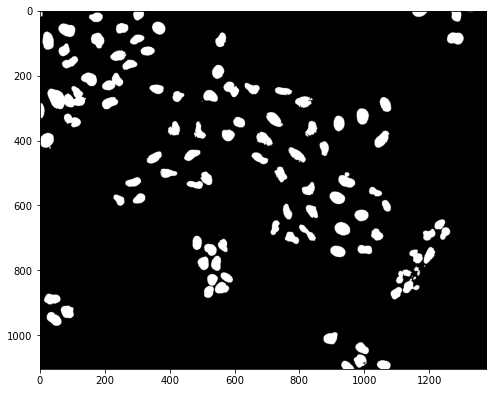

In [33]:
# np.digitize 
regions1 = np.digitize(blue_channel, bins=np.array([ret2]))

fig = plt.figure(figsize=(8, 8))
plt.imshow(regions1, cmap = "gray")

# Auto thresholding for multiple regions

- Opening = erosion followed by dilation
- Closing = dilation followed by erosion
- Skeletonize = erode until single pixel

In [46]:
from skimage.filters import threshold_multiotsu
from scipy import ndimage as nd

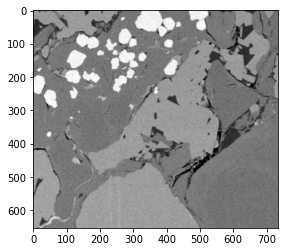

In [37]:
img = cv2.imread("../inpdata/images/BSE.tif", 0)
plt.imshow(img, cmap = "gray")

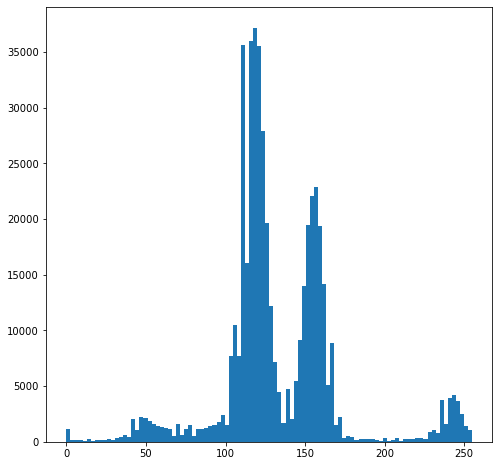

In [39]:
fig = plt.figure(figsize=(8, 8))
plt.hist(img.flat, bins=100, range=(0, 255))
plt.show()

By looking at the histogram you can specify you thresholds mannually, but let's skip this part cause it's boring. We will use multiotsu to accomplish this step automatically

In [41]:
thresholds = threshold_multiotsu(img, classes = 4)

In [42]:
thresholds

array([ 85, 136, 197])

In [43]:
regions = np.digitize(img, bins = thresholds)

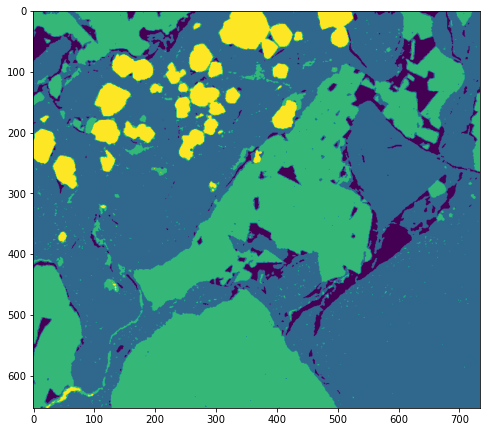

In [44]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(regions)

In [45]:
np.unique(regions)

array([0, 1, 2, 3])

After we have our regions we can split them into segments and perform erosion, dilation and so on ...

In [47]:
segm1 = regions == 0
segm2 = regions == 1
segm3 = regions == 2
segm4 = regions == 3

In [48]:
segm1_opened = nd.binary_opening(segm1, np.ones((3, 3)))
segm1_closed = nd.binary_closing(segm1_opened, np.ones((3, 3)))

segm2_opened = nd.binary_opening(segm2, np.ones((3, 3)))
segm2_closed = nd.binary_closing(segm2_opened, np.ones((3, 3)))

segm3_opened = nd.binary_opening(segm3, np.ones((3, 3)))
segm3_closed = nd.binary_closing(segm3_opened, np.ones((3, 3)))

segm4_opened = nd.binary_opening(segm4, np.ones((3, 3)))
segm4_closed = nd.binary_closing(segm4_opened, np.ones((3, 3)))

In [50]:
all_segments_cleaned = np.zeros((*img.shape, 3))

all_segments_cleaned[segm1_closed] = (1, 0, 0)
all_segments_cleaned[segm2_closed] = (0, 1, 0)
all_segments_cleaned[segm3_closed] = (0, 0, 1)
all_segments_cleaned[segm4_closed] = (0, 1, 1)

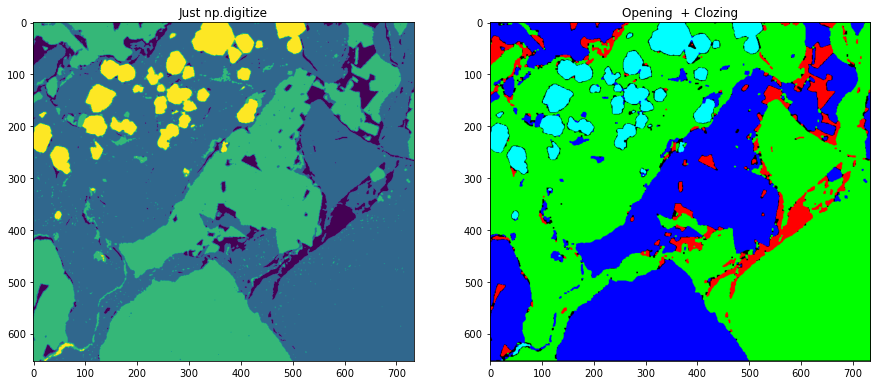

In [51]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 8))

axs.flat[0].imshow(regions)
axs.flat[0].title.set_text("Just np.digitize")

axs.flat[1].imshow(all_segments_cleaned)
axs.flat[1].title.set_text("Opening  + Clozing")